# Meaningful Question 3:

## Does paying more for a house get you more quantity (bedrooms, bathrooms, sqft) or quality (condition, grade)?

## Imports

In [1]:
import pandas as pd
import numpy as np
from helpers import *
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn')

df = pd.read_csv("kc_house_data.csv")

## Data Cleaning

In [2]:
# Creating a new dataframe with only these seven columns
q3_df = df.filter(["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "condition", "grade"])

In [3]:
# Removing an obvious, problematic outlier with 33 bedrooms
q3_df = q3_df[q3_df['bedrooms']!=33]

In [4]:
# Adding a Total Square Feet column to show the combined sqft of living space
# and the lot around the home
q3_df["total_sqft"] = q3_df["sqft_living"] + q3_df["sqft_lot"]

In [23]:
# Dropping other SqFt columns
q3_df = q3_df.drop(columns=["sqft_living", "sqft_lot"])

In [24]:
q3_df.dtypes

price         float64
bedrooms        int64
bathrooms     float64
condition       int64
grade           int64
total_sqft      int64
quartile      float64
dtype: object

In [6]:
# Creating variables for each column
# Also creating variables to log the continuous variables

price = q3_df["price"]
bedrooms = q3_df["bedrooms"]
bathrooms = q3_df["bathrooms"]
sqft_living = q3_df["sqft_living"]
sqft_lot = q3_df["sqft_lot"]
condition = q3_df["condition"]
grade = q3_df["grade"]
total_sqft = q3_df["total_sqft"]

price_log = np.log(price)
sqft_living_log = np.log(sqft_living)
sqft_lot_log = np.log(sqft_lot)
total_sqft_log = np.log(total_sqft)

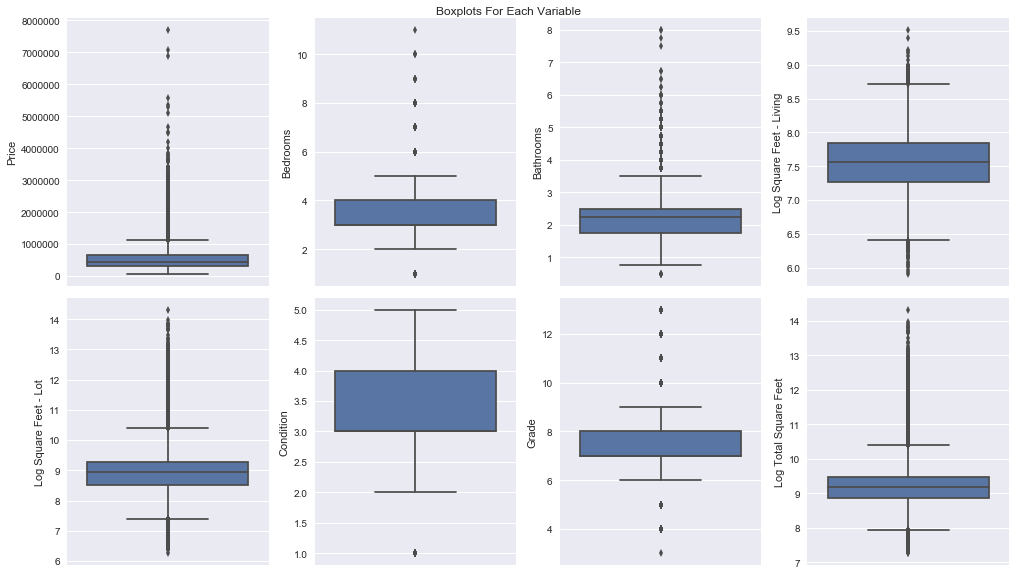

In [7]:
# Creating boxplots for each variable
f1, axes = plt.subplots(2, 4, figsize=(14,8), constrained_layout=True)

ax1_0_0 = sns.boxplot(price, orient='v', ax=axes[0,0])
ax1_0_1 = sns.boxplot(bedrooms, orient='v', ax=axes[0,1])
ax1_0_2 = sns.boxplot(bathrooms, orient='v', ax=axes[0,2])
ax1_0_3 = sns.boxplot(sqft_living_log, orient='v', ax=axes[0,3])
ax1_1_0 = sns.boxplot(sqft_lot_log, orient='v', ax=axes[1,0])
ax1_1_1 = sns.boxplot(condition, orient='v', ax=axes[1,1])
ax1_1_2 = sns.boxplot(grade, orient='v', ax=axes[1,2])
ax1_1_3 = sns.boxplot(total_sqft_log, orient='v', ax=axes[1,3])

ax1_0_0.set_ylabel("Price")
ax1_0_1.set_ylabel("Bedrooms")
ax1_0_2.set_ylabel("Bathrooms")
ax1_0_3.set_ylabel("Log Square Feet - Living")
ax1_1_0.set_ylabel("Log Square Feet - Lot")
ax1_1_1.set_ylabel("Condition")
ax1_1_2.set_ylabel("Grade")
ax1_1_3.set_ylabel("Log Total Square Feet")

f1.suptitle("Boxplots For Each Variable")

plt.show()

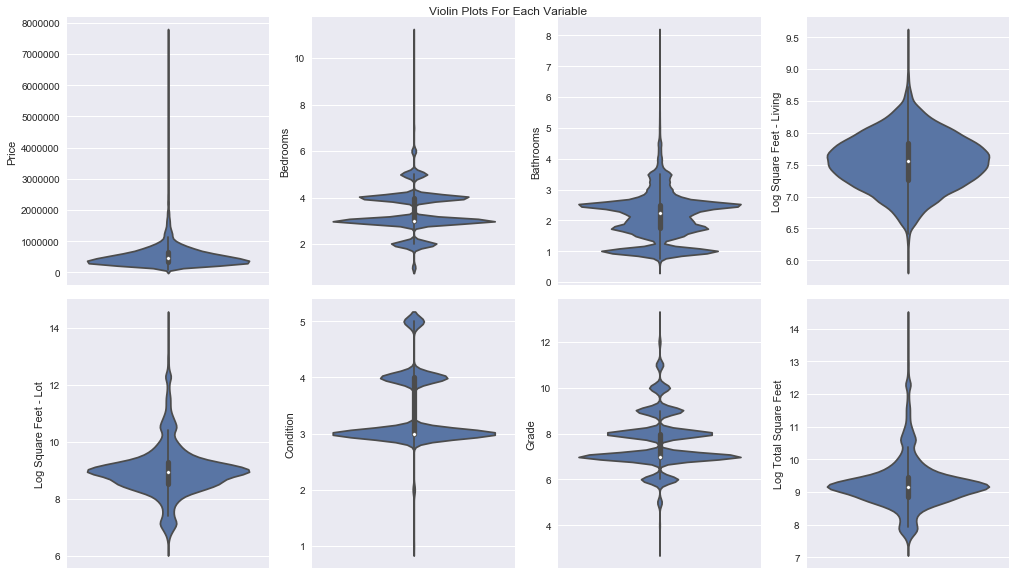

In [8]:
# Creating violinplots (oooh) for each variable
f2, axes = plt.subplots(2, 4, figsize=(14,8), constrained_layout=True)

ax2_0_0 = sns.violinplot(price, orient='v', ax=axes[0,0])
ax2_0_1 = sns.violinplot(bedrooms, orient='v', ax=axes[0,1])
ax2_0_2 = sns.violinplot(bathrooms, orient='v', ax=axes[0,2])
ax2_0_3 = sns.violinplot(sqft_living_log, orient='v', ax=axes[0,3])
ax2_1_0 = sns.violinplot(sqft_lot_log, orient='v', ax=axes[1,0])
ax2_1_1 = sns.violinplot(condition, orient='v', ax=axes[1,1])
ax2_1_2 = sns.violinplot(grade, orient='v', ax=axes[1,2])
ax2_1_3 = sns.violinplot(total_sqft_log, orient='v', ax=axes[1,3])

ax2_0_0.set_ylabel("Price")
ax2_0_1.set_ylabel("Bedrooms")
ax2_0_2.set_ylabel("Bathrooms")
ax2_0_3.set_ylabel("Log Square Feet - Living")
ax2_1_0.set_ylabel("Log Square Feet - Lot")
ax2_1_1.set_ylabel("Condition")
ax2_1_2.set_ylabel("Grade")
ax2_1_3.set_ylabel("Log Total Square Feet")

f2.suptitle("Violin Plots For Each Variable")

plt.show()

#### Splitting data frame into four equal parts, based on quartiles

In [9]:
# Sorting and qcutting in order to arrive at ranges for quartiles
q3_df = q3_df.sort_values(by="price")
pd.qcut(q3_df["price"], 4).value_counts()

(322000.0, 450000.0]     5445
(77999.999, 322000.0]    5406
(450000.0, 645000.0]     5374
(645000.0, 7700000.0]    5371
Name: price, dtype: int64

In [10]:
# Creating a new Quartile column
q3_df.loc[q3_df["price"] <= 323000, "quartile"] = 1
q3_df.loc[q3_df["price"].between(322000.1, 450000.0, inclusive=True), "quartile"] = 2
q3_df.loc[q3_df["price"].between(450000.1, 645000.0, inclusive=True), "quartile"] = 3
q3_df.loc[q3_df["price"] > 645000, "quartile"] = 4

In [11]:
# Creating new dataframes for each quartile, based on price
lowest_df = q3_df.loc[q3_df["price"] <= 322000.0]
second_df = q3_df.loc[q3_df["price"].between(322000.1, 450000.0, inclusive=True)]
third_df = q3_df.loc[q3_df["price"].between(450000.1, 645000.0, inclusive=True)]
highest_df = q3_df.loc[q3_df["price"] > 645000.0]

#### Creating and melting quality and quantity columns

In [30]:
# Standardizing all variables to the same scale
scaled_df = pd.DataFrame()
scaled_df["price"] = q3_df["price"]
scaled_df["price"] = (acc-min(acc))/(max(acc)-min(acc))


,price
15279,78000.0
465,80000.0
16184,81000.0
8267,82000.0
2139,82500.0
18453,83000.0
3763,84000.0
16700,85000.0
10242,85000.0
13743,86500.0


In [25]:
melted_q3_df = pd.melt(q3_df,
                       id_vars=["price", "quartile"],
                       var_name="all_var")
melted_q3_df.head()

# # Melting quantity columns (bedrooms, bathrooms and total_sqft) into one column
# melted_quantity_df = pd.melt(quantity_df,
#                             id_vars=["price", "quartile"],
#                             var_name="quantity")

,price,quartile,all_var,value
0,78000.0,1.0,bedrooms,2.0
1,80000.0,1.0,bedrooms,1.0
2,81000.0,1.0,bedrooms,2.0
3,82000.0,1.0,bedrooms,3.0
4,82500.0,1.0,bedrooms,2.0


In [16]:
# quality_df = q3_df.filter(["price", "condition", "grade", "quartile"])

# # Melting quality columns (condition, grade) into one column
# melted_quality_df = pd.melt(quality_df,
#                             id_vars=["price", "quartile"],
#                             var_name="quality")
# melted_quality_df.head(10)

## Analyzing

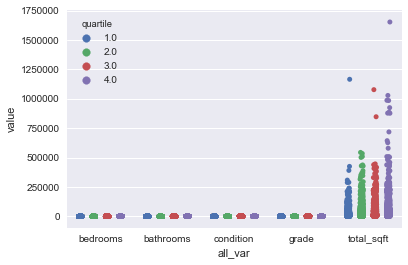

In [26]:
# f3, axes = plt.subplots(1, 2, figsize=(12,8), constrained_layout=True)

sns.stripplot(x="all_var",
              y="value",
              hue="quartile",
              data=melted_q3_df,
              dodge=True)
# ax3_1 = sns.distplot(melted_quality_df["quality"],
#                       ax=axes[1])

In [ ]:
sns.pairplot(q3_df)

In [ ]:
# Describing the original dataframe
q3_df.describe()

In [ ]:
# Describing the lowest (least expensive) data set
lowest_df.describe()

In [ ]:
# Describing the second-lowest (second least expensive) data set
second_df.describe()

In [ ]:
# Describing the third lowest (second most expensive) data set
third_df.describe()

In [ ]:
# Describing the highest (most expensive) data set
highest_df.describe()

In [ ]:
# Creating a dataframe for quantity variables, using the log of total square feet
quantity_df = pd.DataFrame()
quantity_df["price"] = price
quantity_df["bedrooms"] = bedrooms
quantity_df["bathrooms"] = bathrooms
quantity_df["total_sqft_log"] = total_sqft_log

# Modeling our quantity variables against target Price
quantity_model = ols(formula=('price~bedrooms+bathrooms+total_sqft_log'), data=quantity_df).fit()
quantity_model.summary()

In [ ]:
# Creating a dataframe for quality variables
quality_df = q3_df[["price", "condition", "grade"]]

# Modeling our quality variables against target Price
quality_model = ols(formula=('price~condition+grade'), data=quality_df).fit()
quality_model.summary()

## Summary: